In [112]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pts

Consideremos las ecuaciones que modulan el movimiento parabólico:

$$ x = v_0 \cdot \cos \theta \cdot t $$
$$ y = v_0 \cdot \sin \theta \cdot t - \frac{1}{2}g \cdot t^2 $$

Ahora bien, la intención es generar un programa que calcule las posiciones del balón en un intervalo de tiempo, donde el tiempo máximo está dado por el tiempo de vuelo, que resulta de igualar y a 0:

$$ t = \frac{2v_0 \cdot \sin \theta}{g} $$

Luego de calcular las posiciones para cada instante de tiempo, calcula la distancia entre los puntos asociados al que se encuentra el balón y el punto central de la cesta. 

Dicho punto corresponde a la mitad de la medida de la cesta que es de 50 cm, luego como la distancia total al final de la cesta es de 14 m entonces el punto central se encuentra con la resta $ x_{final} = 14 - 0.25 \ m = 13.75 \ m$; mientras que para la altura está dado por la resta entre la altura de la cesta 3 m y la altura del jugador 1.85 m, luego $y_{final} = 1.15\ m$.

Ahora bien, si al calcular la distancia en x la diferencia entre estos puntos esta es menor al valor de la mitad de la canasta entonces se produce una cesta, siempre que esta distancia para y sea igual a la mitad de la altura del balón que es de 12 cm, tomando la consideración de que si pasa por esta distancia el tamaño del balón hará que rebote en el orillo y caiga en la cesta. Además, para considerar que el balón siempre entre por encima de la cesta tomamos la derivada de la función $y(x)$ con respecto a x, para lo cual haciendo fracciones parciales tenemos:

$$ \frac{dy}{dx} = \frac{\partial y}{\partial t} \cdot \frac{\partial t}{\partial x}$$
$$ = \frac{\partial y}{\partial t} \cdot \frac{1}{\partial x / \partial t} $$
$$ = \tan \theta - \frac{g \ t}{v_0 \cdot \cos \theta} $$

In [179]:
def xy(v0,theta,t):
    g=9.8
    return (v0*np.cos(theta)*t, 0.01+v0*np.sin(theta)*t - 1/2*g*t**2)

v0=12.6
theta=np.radians(60)
g = 9.8

tiempo_vuelo=2*v0*np.sin(theta)/g
ts=np.linspace(0,tiempo_vuelo,100)

pos=np.zeros((len(ts),2))
for i in range(len(ts)):
    pos[i,0]= xy(v0,theta,ts[i])[0]
    pos[i,1]= xy(v0,theta,ts[i])[1]

In [180]:
epsx=0.25
epsy=0.12

x_final=13.75 #m
y_final=1.15 #m

diffx = [np.abs(x_final - tupla[0]) for tupla in pos]
diffy = [np.abs(y_final - tupla[1]) for tupla in pos]

pend = []
for i in range(len(ts)):
    a =[np.tan(theta)-(g*ts[i])/(v0*np.cos(theta))]
    pend.append(a)
    
for i in range(len(diff)):
    if diffx[i]<epsx and diffy[i]<epsy and pend[i][0]<0:
        print("encestó")
        break
    elif pos[i,0]>14:
        print("no encestó")
        break

no encestó


Para facilitar el análisis de los resultados realizamos una gráfica de y vs. x de manera que podamos ver la elipse y la pendiente de la función al tocarla.

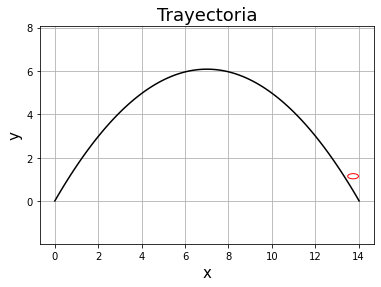

In [181]:
plt.figure()
ax=plt.gca()

plt.plot(pos[:,0],pos[:,1], "k-")
ax.add_patch(pts.Ellipse((x_final, y_final), 2*epsx, 2*epsy, color="red", fill=False))

plt.title("Trayectoria", size=18)
plt.xlabel("x",size=15)
plt.ylabel("y",size=15)
plt.xlim(0,2*x_final)
plt.ylim(0,2*y_final)
plt.axis("equal")
plt.grid()
plt.show()